In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import MDAnalysis as mda
import seaborn as sns
from seaborn import kdeplot
from pylab import cm
from tqdm import tqdm
import warnings

# Ignore all UserWarnings
warnings.filterwarnings("ignore")


In [2]:
#######PLOTTING PARAMS########
plt.rcParams['figure.dpi'] = 600
plt.figure(figsize=(10, 30))
plt.rc("axes",linewidth=2)
plt.rc("legend",fontsize=10,frameon=False)
plt.rcParams['text.usetex'] = False
plt.rcParams['font.size'] = 10
plt.rcParams['font.family'] = "serif"
tdir = 'in'
major = 5.0
minor = 3.0
plt.rcParams['xtick.direction'] = tdir
plt.rcParams['ytick.direction'] = tdir
plt.rcParams['xtick.major.size'] = major
plt.rcParams['xtick.minor.size'] = minor
#plt.savefig('my_plot.png', dpi=600)  # Save with DPI of 400

<Figure size 6000x18000 with 0 Axes>

In [3]:
import pandas as pd
import os,sys
sys.path.append('../../scripts/')
sys.path.append('../../plot_styles/')
sys.path.append('../../data/')


In [4]:
my_df = pd.read_csv('../../data/admet.csv', on_bad_lines='skip')
print(my_df.columns)
my_df

Index(['HIA', 'OB', 'p-gp inhibitor', 'p-gp substrates', 'BBB',
       'Respiratory toxicity', 'Hepatotoxicity', 'half-life', 'CL',
       'Cardiotoxicity1', 'Cardiotoxicity10', 'Cardiotoxicity30',
       'Cardiotoxicity5', 'CYP1A2', 'CYP2C19', 'CYP2C9', 'CYP2D6', 'CYP3A4',
       'Acute oral toxicity (LD50)', 'IGC50', 'ESOL', 'logD',
       'Caco-2 permeability', 'PPB', 'group', 'smiles'],
      dtype='object')


HIA  OB  p-gp inhibitor  p-gp substrates  BBB  Respiratory toxicity  \
0      1.0 NaN             NaN              NaN  NaN                   NaN   
1      0.0 NaN             NaN              NaN  NaN                   NaN   
2      1.0 NaN             NaN              NaN  NaN                   NaN   
3      1.0 NaN             NaN              NaN  NaN                   NaN   
4      1.0 NaN             NaN              NaN  NaN                   NaN   
...    ...  ..             ...              ...  ...                   ...   
48385  NaN NaN             NaN              NaN  NaN                   NaN   
48386  NaN NaN             NaN              NaN  NaN                   NaN   
48387  NaN NaN             NaN              NaN  NaN                   NaN   
48388  NaN NaN             NaN              NaN  NaN                   NaN   
48389  NaN NaN             NaN              NaN  NaN                   NaN   

       Hepatotoxicity  half-life  CL  Cardiotoxicity1  ...  CYP2D6  CYP3A4  \
0                 NaN        NaN NaN              NaN  ...     NaN     NaN   
1                 NaN        NaN NaN              NaN  ...     NaN     NaN   
2                 NaN        NaN NaN              NaN  ...     NaN     NaN   
3                 NaN        NaN NaN              NaN  ...     NaN     NaN   
4                 NaN        NaN NaN              NaN  ...     NaN     NaN   
...               ...        ...  ..              ...  ...     ...     ...   
48385             NaN        NaN NaN              NaN  ...     NaN     NaN   
48386             NaN        NaN NaN              NaN  ...     NaN     NaN   
48387             NaN        NaN NaN              NaN  ...     NaN     NaN   
48388             NaN        NaN NaN              NaN  ...     NaN     NaN   
48389             NaN        NaN NaN              NaN  ...     NaN     NaN   

       Acute oral toxicity (LD50)  IGC50  ESOL  logD  Caco-2 permeability  \
0                             NaN    NaN   NaN   NaN                  NaN   
1                             NaN    NaN   NaN   NaN                  NaN   
2                             NaN    NaN   NaN   NaN                  NaN   
3                             NaN    NaN   NaN   NaN                  NaN   
4                             NaN    NaN   NaN   NaN                  NaN   
...                           ...    ...   ...   ...                  ...   
48385                         NaN    NaN   NaN   NaN                  NaN   
48386                         NaN    NaN   NaN   NaN                  NaN   
48387                         NaN    NaN   NaN   NaN                  NaN   
48388                         NaN    NaN   NaN   NaN                  NaN   
48389                         NaN    NaN   NaN   NaN                  NaN   

        PPB     group                                             smiles  
0       NaN  training                  C[C@H](CS)C(=O)N1CCC[C@H]1C(=O)O   
1       NaN  training                   C(=O)(CC(C[N+](C)(C)C)OC(=O)C)O   
2       NaN  training  OC(=O)C1=CCS[C@H]2N1C(=O)[C@H]2NC(=O)/C(=N\OC)...  
3       NaN  training              O/N=C\1/CCCC(c2ccc(cc2)C(C(=O)O)C)C1   
4       NaN  training                c1cc(ccc1N)S(=O)(=O)Nc1c(c(C)ns1)C   
...     ...       ...                                                ...  
48385  62.0     valid  Fc1cc2c(N(C=C(C(=O)[O-])C2=O)c2cc(ccc2)C(F)(F)...  
48386  32.0     valid  S1C2N(C(=O)C2NC(=O)\C(=N/OC)\c2occc2)C(C(=O)[O...  
48387  73.0     valid  s1cccc1CC(=O)NC1(OC)C2SCC(COC(=O)N)=C(N2C1=O)C...  
48388  20.0     valid              Oc1cc(ccc1O)C[C@]([NH3+])(C(=O)[O-])C  
48389   5.0     valid  O1C2C(OC3OC(CC(=O)C13O)C)C(O)C([NH2+]C)C(O)C2[...  

[48390 rows x 26 columns]

In [5]:
# Assuming 'df' is your DataFrame
properties = ['HIA', 'OB', 'p-gp inhibitor', 'p-gp substrates', 'BBB',
              'Respiratory toxicity', 'Hepatotoxicity', 'half-life', 'CL',
              'Cardiotoxicity1', 'Cardiotoxicity10', 'Cardiotoxicity30',
              'Cardiotoxicity5', 'CYP1A2', 'CYP2C19', 'CYP2C9', 'CYP2D6', 'CYP3A4',
              'Acute oral toxicity (LD50)', 'IGC50', 'ESOL', 'logD',
              'Caco-2 permeability', 'PPB']

# Get the count of non-NaN values for each property column
non_nan_counts = my_df[properties].notna().sum()


print(non_nan_counts)

HIA                             734
OB                             1055
p-gp inhibitor                 2077
p-gp substrates                 888
BBB                            2320
Respiratory toxicity           1399
Hepatotoxicity                 1313
half-life                      1323
CL                             1338
Cardiotoxicity1                1565
Cardiotoxicity10               1565
Cardiotoxicity30               1565
Cardiotoxicity5                1565
CYP1A2                         9748
CYP2C19                       10598
CYP2C9                         9906
CYP2D6                        10682
CYP3A4                        11369
Acute oral toxicity (LD50)     7313
IGC50                          1787
ESOL                           1128
logD                           1130
Caco-2 permeability            4463
PPB                            1830
dtype: int64


In [6]:
from rdkit.Chem import rdFingerprintGenerator
mfpgen = rdFingerprintGenerator.GetMorganGenerator(radius=2,fpSize=1024)
rdkgen = rdFingerprintGenerator.GetRDKitFPGenerator(fpSize=2048)
apgen = rdFingerprintGenerator.GetAtomPairGenerator(fpSize=2048)
ttgen = rdFingerprintGenerator.GetTopologicalTorsionGenerator(fpSize=2048)

In [7]:
from thermo import functional_groups

func_groups = ['alkane', 'alcohol', 'aldehyde', 'alkene',
               'alkyne', 'amide', 'carbamate', 'carboxylic_acid', 'ester',
               'ether', 'hydrocarbon', 'ketone', 'nitrate',
               'nitrile', 'nitro', 'tertiary_amine', 'sulfide',
               'primary_amine', 'phenol', 'secondary_amine',
               'sulfone', 'polyol', 'pyridyl']

In [8]:
name_function = {
'alkane':functional_groups.is_alkane,
'alcohol':functional_groups.is_alcohol,
'aldehyde':functional_groups.is_aldehyde,
'alkene':functional_groups.is_alkene,
'alkyne':functional_groups.is_alkyne,
'amide':functional_groups.is_amide,
'carbamate':functional_groups.is_carbamate,
'carboxylic_acid':functional_groups.is_carboxylic_acid,
'ester':functional_groups.is_ester,
'ether':functional_groups.is_ether,
'hydrocarbon':functional_groups.is_hydrocarbon,
'ketone':functional_groups.is_ketone,
'nitrate':functional_groups.is_nitrate,
'nitrile':functional_groups.is_nitrile,
'nitro':functional_groups.is_nitro,
'tertiary_amine':functional_groups.is_tertiary_amine,
'sulfide':functional_groups.is_sulfide,
'primary_amine':functional_groups.is_primary_amine,
'phenol':functional_groups.is_phenol,
'secondary_amine':functional_groups.is_secondary_amine,
'sulfone':functional_groups.is_sulfone,
'polyol':functional_groups.is_polyol,
'imide':functional_groups.is_imide,
'imine':functional_groups.is_imine,
'pyridyl':functional_groups.is_pyridyl
}

In [9]:
df = my_df
print(len(df))

48390


In [10]:
from rdkit import Chem
df["mol"] = df['smiles'].apply(lambda x : Chem.MolFromSmiles(x.strip()))
for name in name_function:
    df[name] = df['mol'].apply(lambda x : name_function[name](x))

In [11]:
df_gr_count = []

for gr in func_groups:
    try:
        df_gr_count.append(df[gr].value_counts()[True])
    except:
        df_gr_count.append(0)

In [12]:
from cycler import cycler
def Ticker(ax):
    """
    Styles the matplotlib axis..

    """
    from matplotlib.ticker import AutoMinorLocator
    minor_locator = AutoMinorLocator(2)
    ax.xaxis.set_minor_locator(minor_locator)
    minor_locator = AutoMinorLocator(2)
    ax.yaxis.set_minor_locator(minor_locator)
    return ax
plt.style.use("../../plot_styles/style.txt")
plt.rcParams['font.family'] = 'C059'


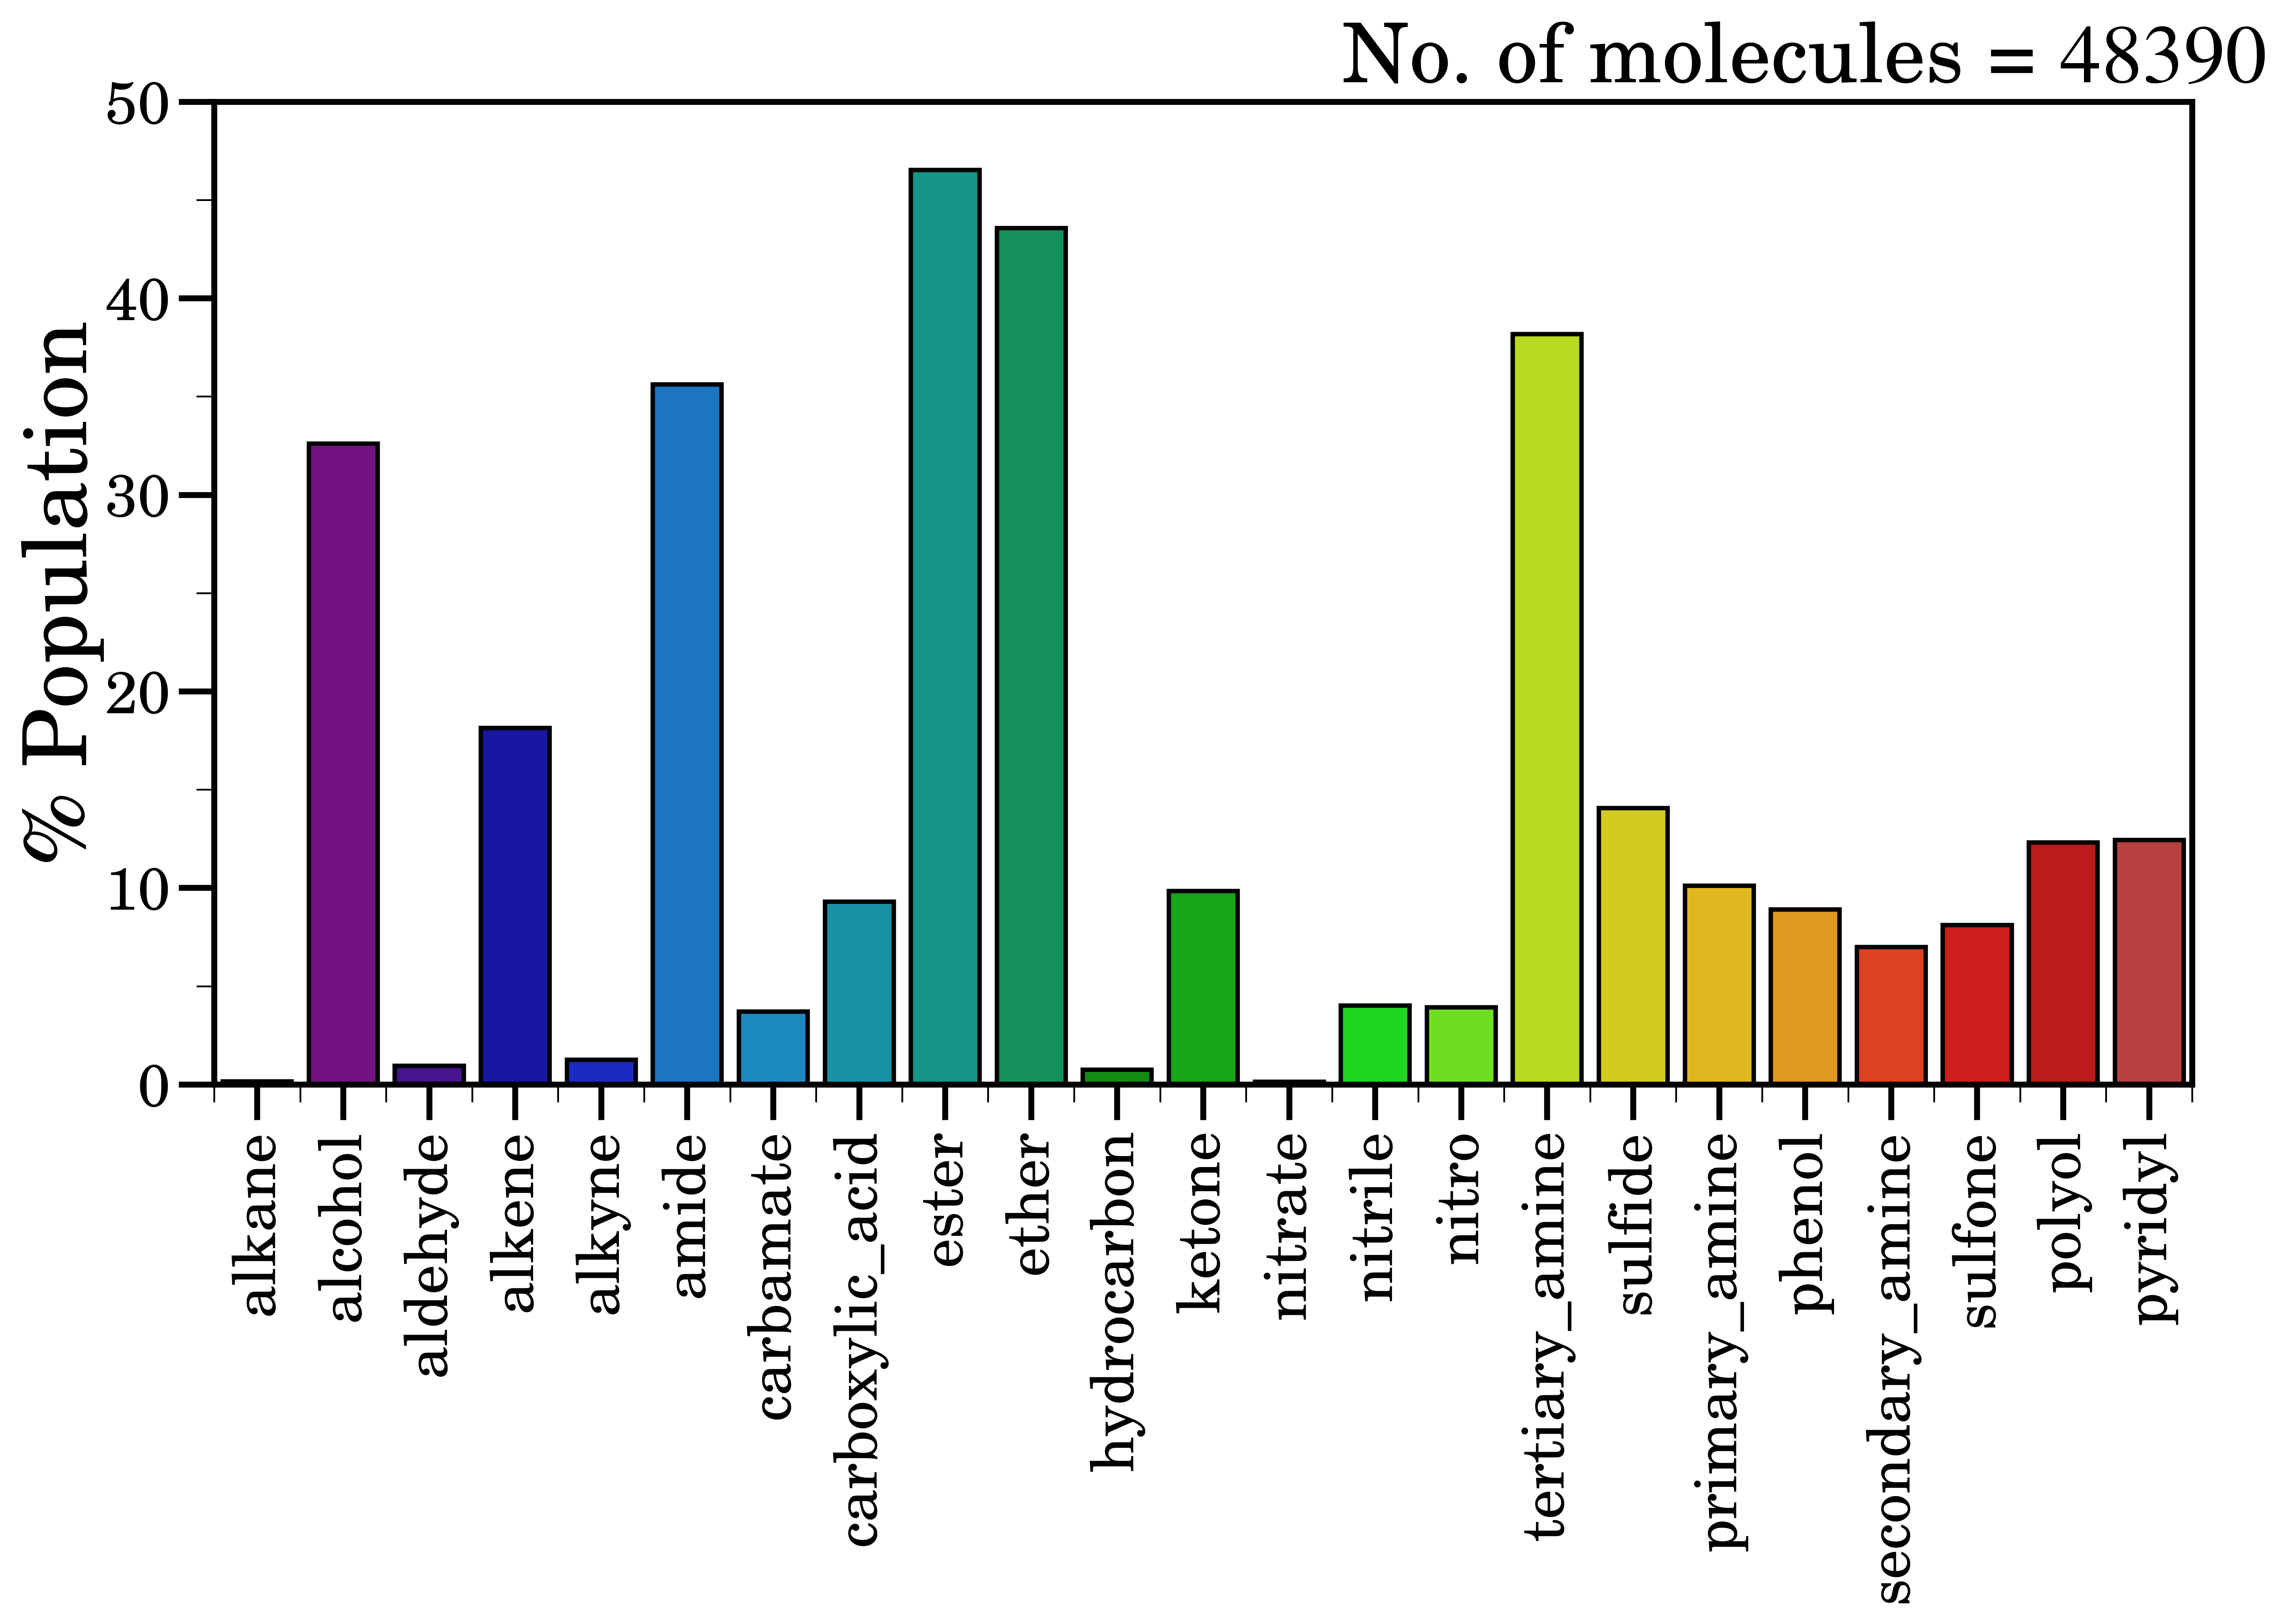

In [13]:
fig, ax = plt.subplots(figsize = (12, 6))
sns.barplot(x = func_groups, y = (np.array(df_gr_count)/len(df))*100 ,
            edgecolor = "k", linewidth =1.5,hue = func_groups, palette=sns.color_palette("nipy_spectral", 23))
plt.xticks(rotation = 90)
ax.set_ylabel("% Population", fontsize = 30)
ax.set_xlabel("")
#plt.title("Training Dataset",fontsize = 36)
plt.text(x = 0.57, y = 1.02,transform=plt.gca().transAxes, s = f"No. of molecules = ${len(df)}$", fontsize = 28)
Ticker(ax)
plt.show()

In [14]:
# Set up the properties for Venn diagram analysis
properties = df.columns[:24]  # Exclude 'group' and 'smiles'
print(properties)
# Create sets for Venn
sets = [set(df[col][pd.notna(df[col])].index) for col in properties]

Index(['HIA', 'OB', 'p-gp inhibitor', 'p-gp substrates', 'BBB',
       'Respiratory toxicity', 'Hepatotoxicity', 'half-life', 'CL',
       'Cardiotoxicity1', 'Cardiotoxicity10', 'Cardiotoxicity30',
       'Cardiotoxicity5', 'CYP1A2', 'CYP2C19', 'CYP2C9', 'CYP2D6', 'CYP3A4',
       'Acute oral toxicity (LD50)', 'IGC50', 'ESOL', 'logD',
       'Caco-2 permeability', 'PPB'],
      dtype='object')


In [15]:
labels = np.array(['HIA', 'OB', 'p-gp inhibitor', 'p-gp substrates', 'BBB',
       'Respiratory toxicity', 'Hepatotoxicity', 'half-life', 'CL',
       'Cardiotoxicity1', 'Cardiotoxicity10', 'Cardiotoxicity30',
       'Cardiotoxicity5', 'CYP1A2', 'CYP2C19', 'CYP2C9', 'CYP2D6', 'CYP3A4',
       'Acute oral toxicity (LD50)', 'IGC50', 'ESOL', 'logD',
       'Caco-2 permeability', 'PPB'])

In [16]:
import pandas as pd

# Assuming `df` is your DataFrame
# Separate properties and functional groups
properties = df.iloc[:, :24]  # First 24 columns
functional_groups = df.iloc[:, -25:]  # Last 23 columns

# Create an empty DataFrame to store the counts
count_matrix = pd.DataFrame(0, index=properties.columns, columns=functional_groups.columns)

# Loop over each functional group
for group in functional_groups.columns:
    # Select rows where the functional group is True
    group_rows = df[functional_groups[group] == True]

    # Count non-NaN values for each property in the selected rows and store it in the matrix
    count_matrix[group] = group_rows[properties.columns].notna().sum()


# Display the result
print(count_matrix)


                            alkane  alcohol  aldehyde  alkene  alkyne  amide  \
HIA                              0      383         0     168      16    219   
OB                               0      433         4     228      20    342   
p-gp inhibitor                   0      781         1     465      16    519   
p-gp substrates                  0      442         8     234       6    229   
BBB                             22      977        14     625      22    781   
Respiratory toxicity             0      357        23     219       5    373   
Hepatotoxicity                   0      700         5     293      23    340   
half-life                        0      774         6     299      25    553   
CL                               0      783         6     303      25    560   
Cardiotoxicity1                  0      410         0     214      13    664   
Cardiotoxicity10                 0      410         0     214      13    664   
Cardiotoxicity30                 0      

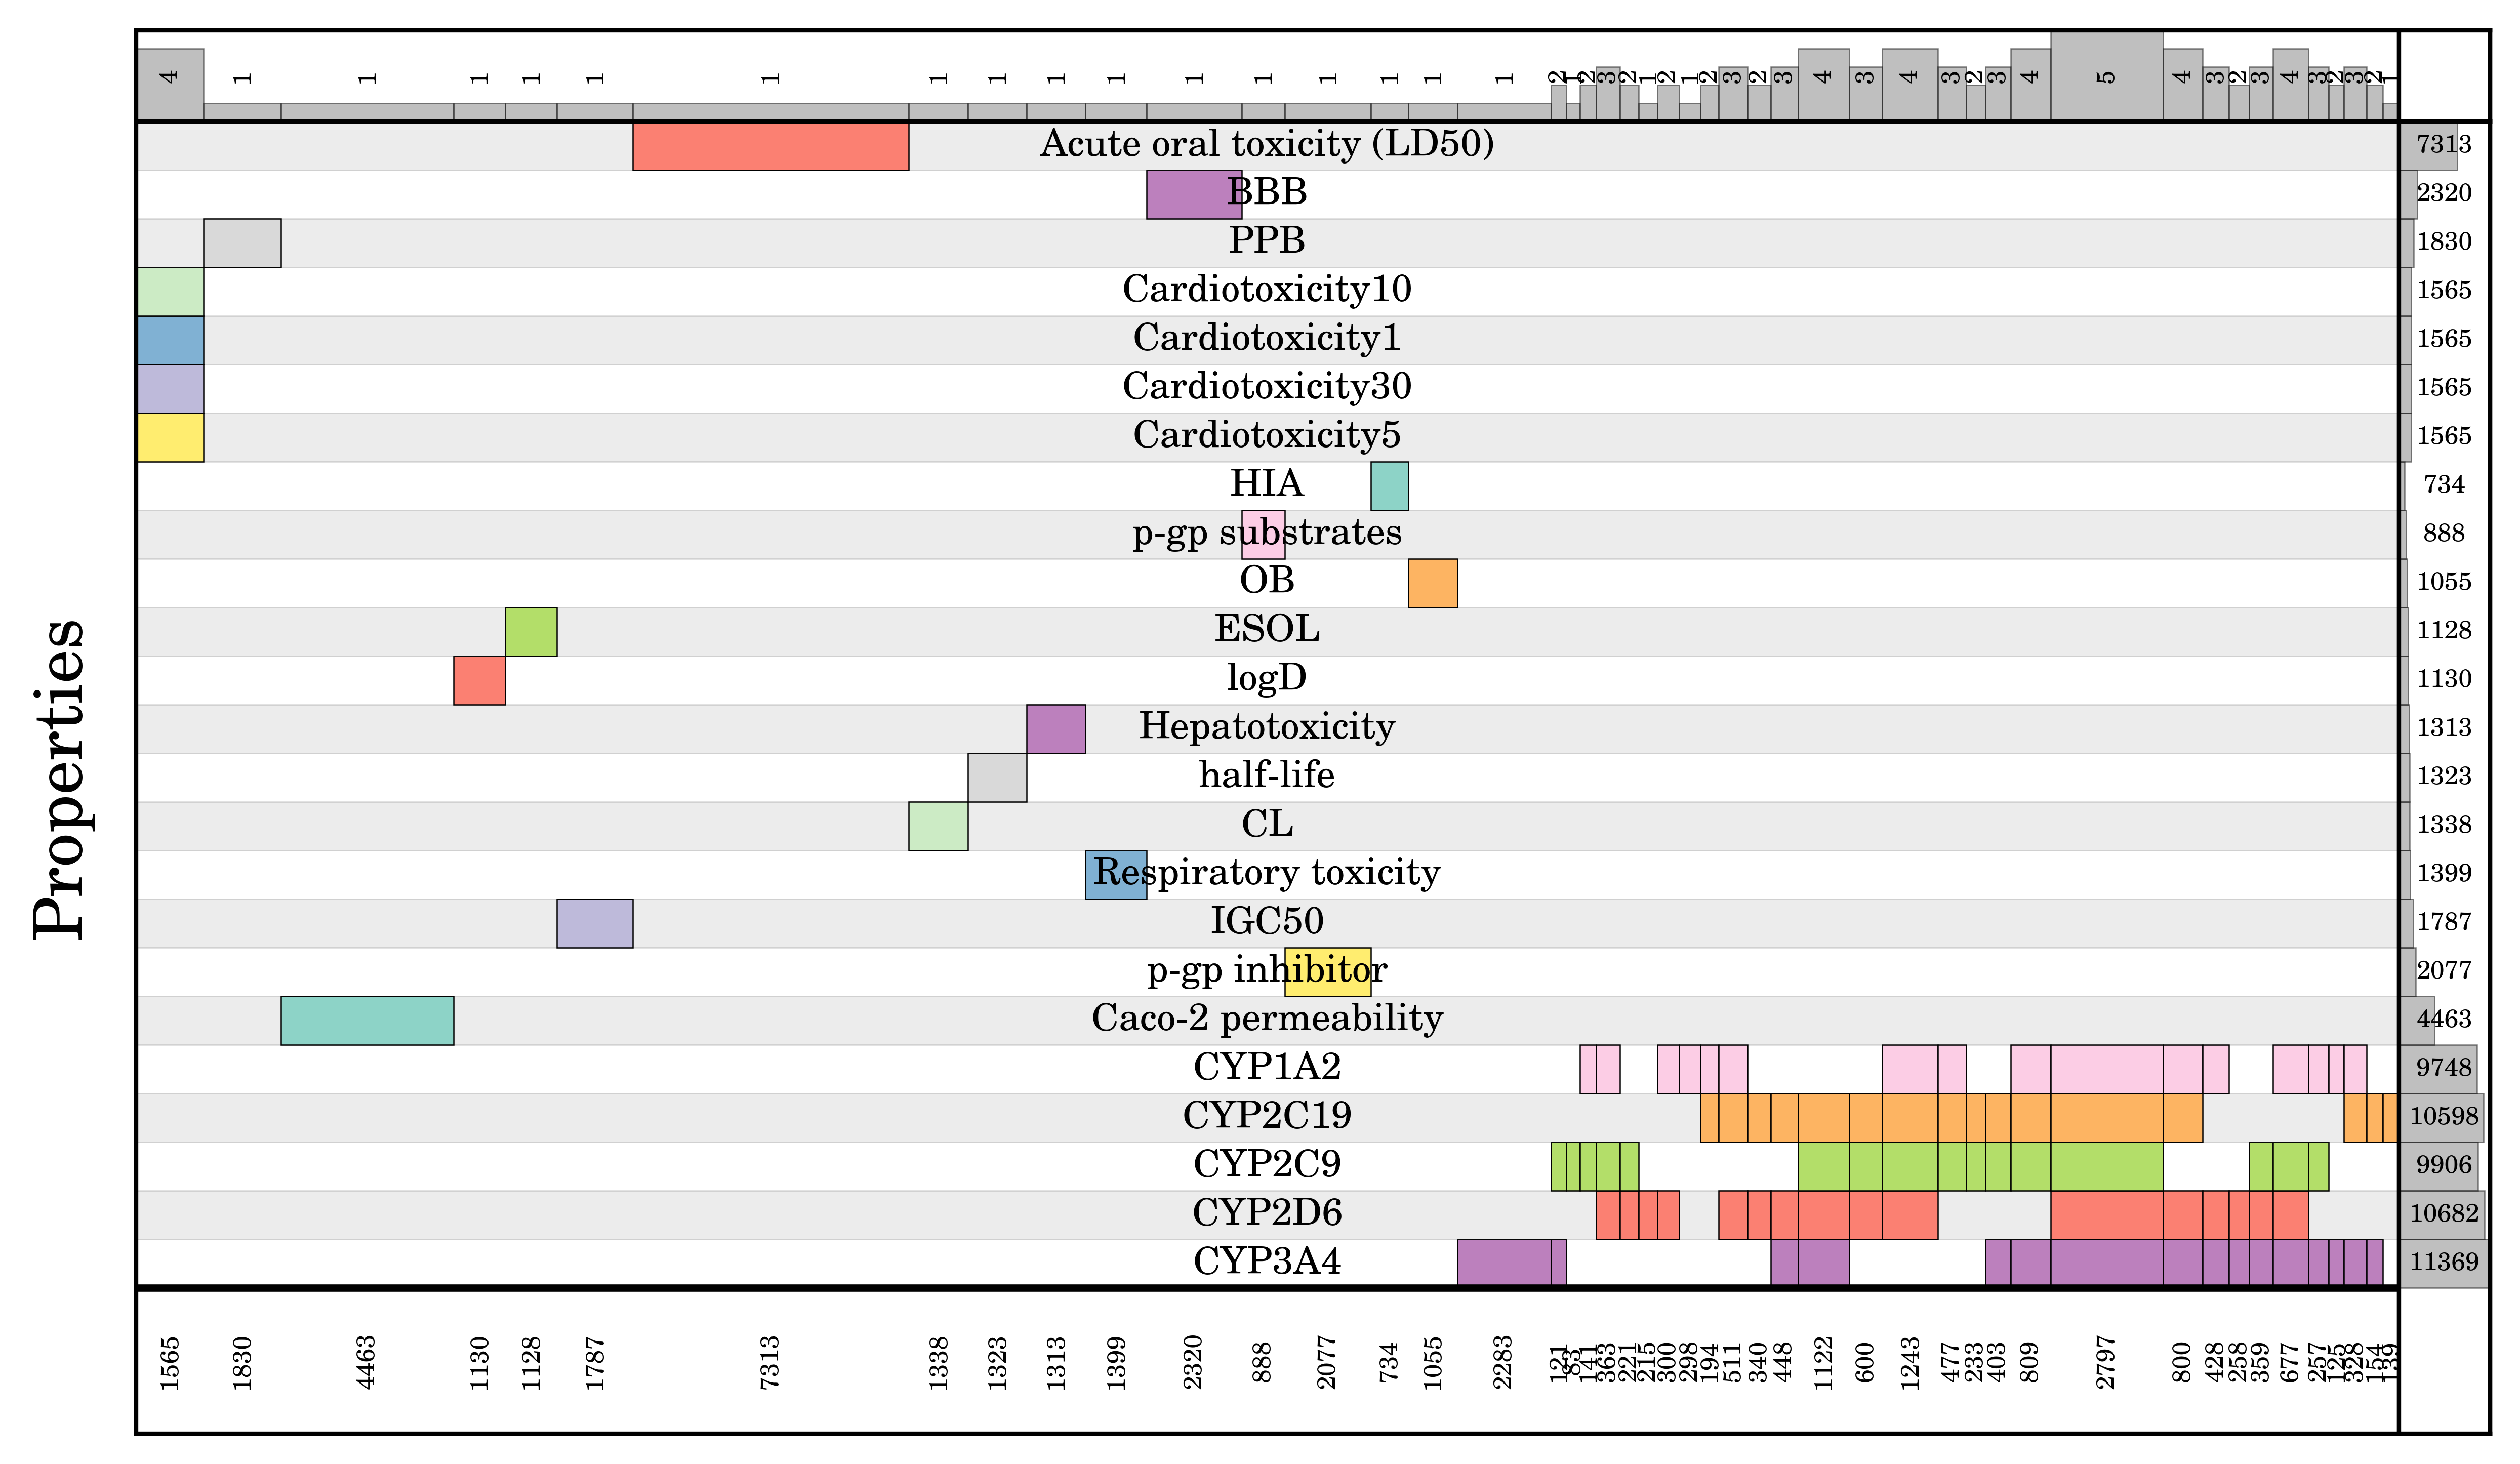

In [17]:
from supervenn import supervenn
import matplotlib
# Create functional group labels (assuming they are the column names of your count_matrix)
func_groups = count_matrix.columns.tolist()
plt.rc("axes",linewidth=1)
# Create the plot
fig, ax = plt.subplots(figsize=[10, 6])
# Customize axis tick parameters
ax.tick_params(left=False, right=False, labelleft=False,
               labelbottom=False, bottom=False, labelsize=4)
# Generate the SuperVenn diagram
with plt.style.context('seaborn-v0_8-notebook'):
    m = supervenn(sets, labels, ax=ax,
                  side_plots=True, widths_minmax_ratio=0.05,
                  min_width_for_annotation=0.8, rotate_col_annotations=True,
                  bar_alpha=1.0, sets_ordering='minimize gaps', side_plot_width=0.3,fontsize = 6)

# Adjust annotation sizes
for child in m.axes['main'].get_children():
    if isinstance(child, matplotlib.text.Annotation):
        if not child.get_text().isnumeric():
            child.set_size(9)
            child.set_alpha(1.0)  # Ensure full opacity


# Remove ticks
m.axes['main'].set_xticks([])
m.axes['main'].set_yticks([])
m.axes['top_side_plot'].set_xticks([])
m.axes['top_side_plot'].set_yticks([])
m.axes['right_side_plot'].set_xticks([])
m.axes['right_side_plot'].set_yticks([])
# Set axis labels
m.axes['main'].set_ylabel("Properties", labelpad=10, fontsize=16)
m.axes['main'].set_xlabel("", labelpad=6)
plt.savefig('super_venn_admet.pdf', dpi=600)  # Save with DPI of 400
# Show the plot
plt.show()


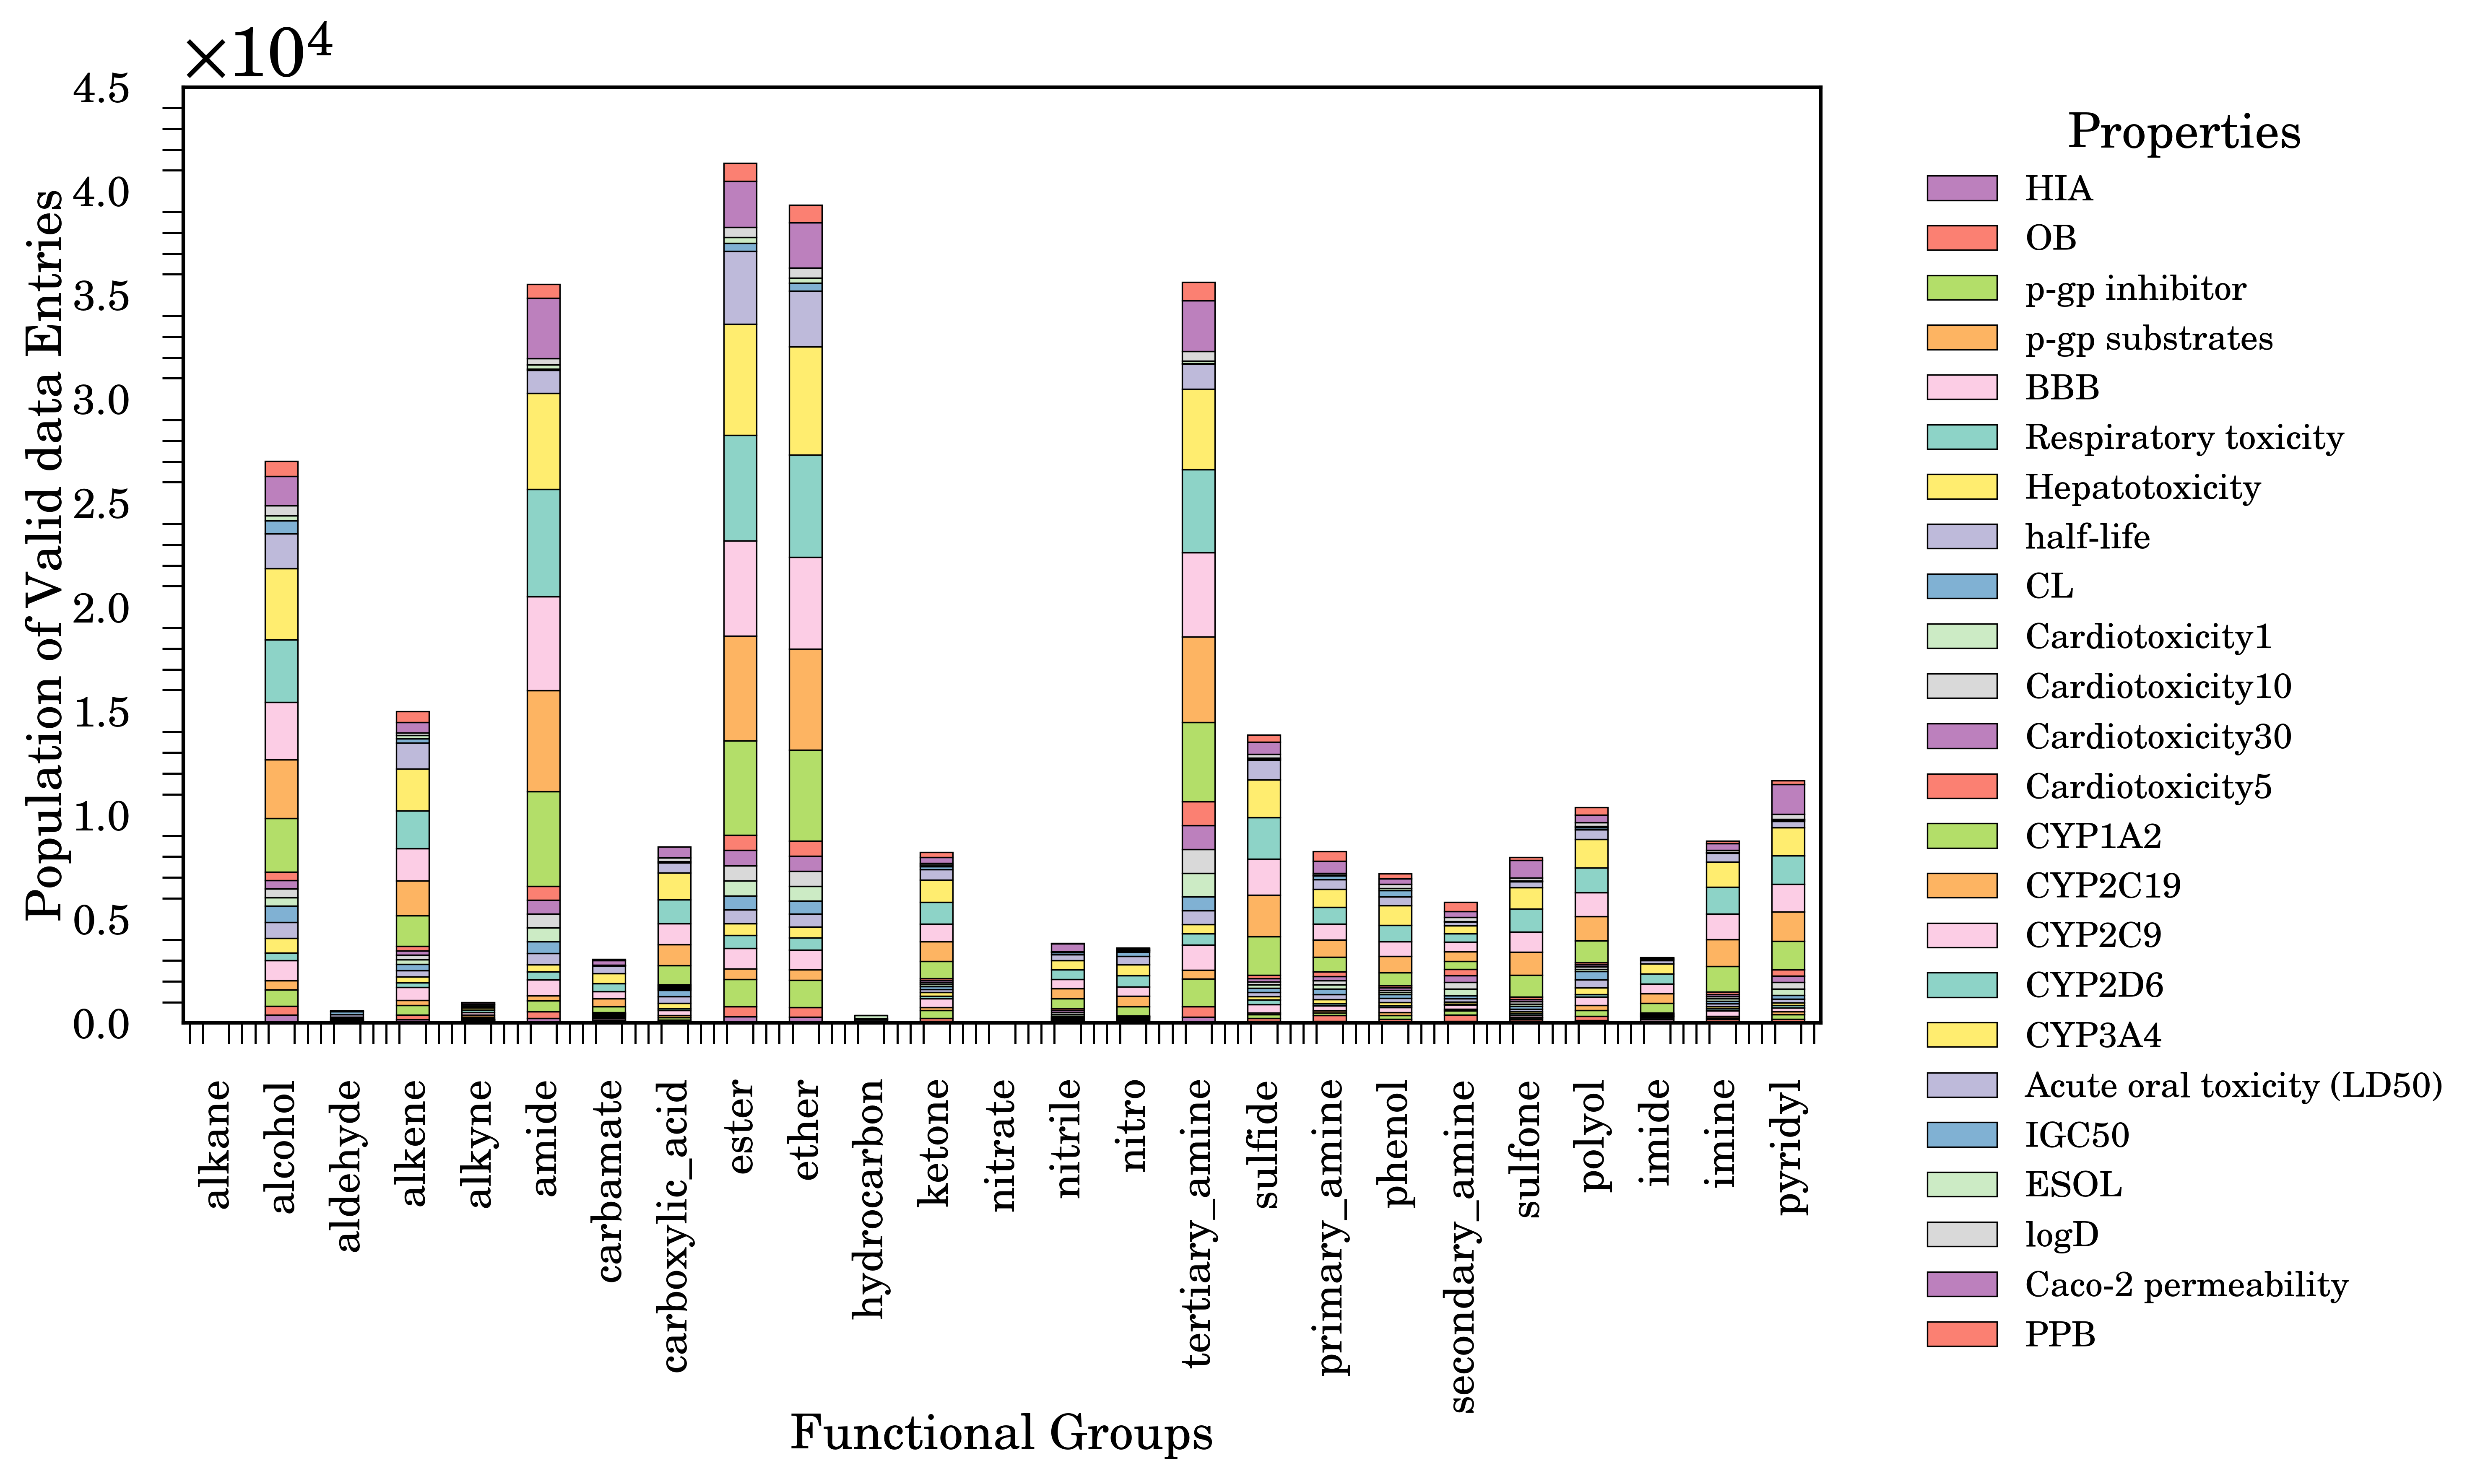

In [18]:
from matplotlib.ticker import ScalarFormatter
# Plot stacked bar graphs
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the size as needed
# Customize axis tick parameters
ax.tick_params(left=False, right=False, labelleft=True,
               labelbottom=True, bottom=False, labelsize=12)
# Plot stacked bar for each property, showing functional group distribution
count_matrix.T.plot(kind='bar', stacked=True, ax=ax)

# Set plot title and labels
ax.set_xlabel('Functional Groups', fontsize=14)
ax.set_ylabel('Population of Valid data Entries', fontsize=14)
# Format the y-axis to remove scientific notation (x10^4)
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.ticklabel_format(style='sci', axis='y')  # Ensures plain style without scientific notation
# Display legend
plt.legend(title="Properties",title_fontsize = 14, bbox_to_anchor=(1.05, 1), loc='upper left',fontsize = 10)

# Show the plot
plt.tight_layout()
plt.show()

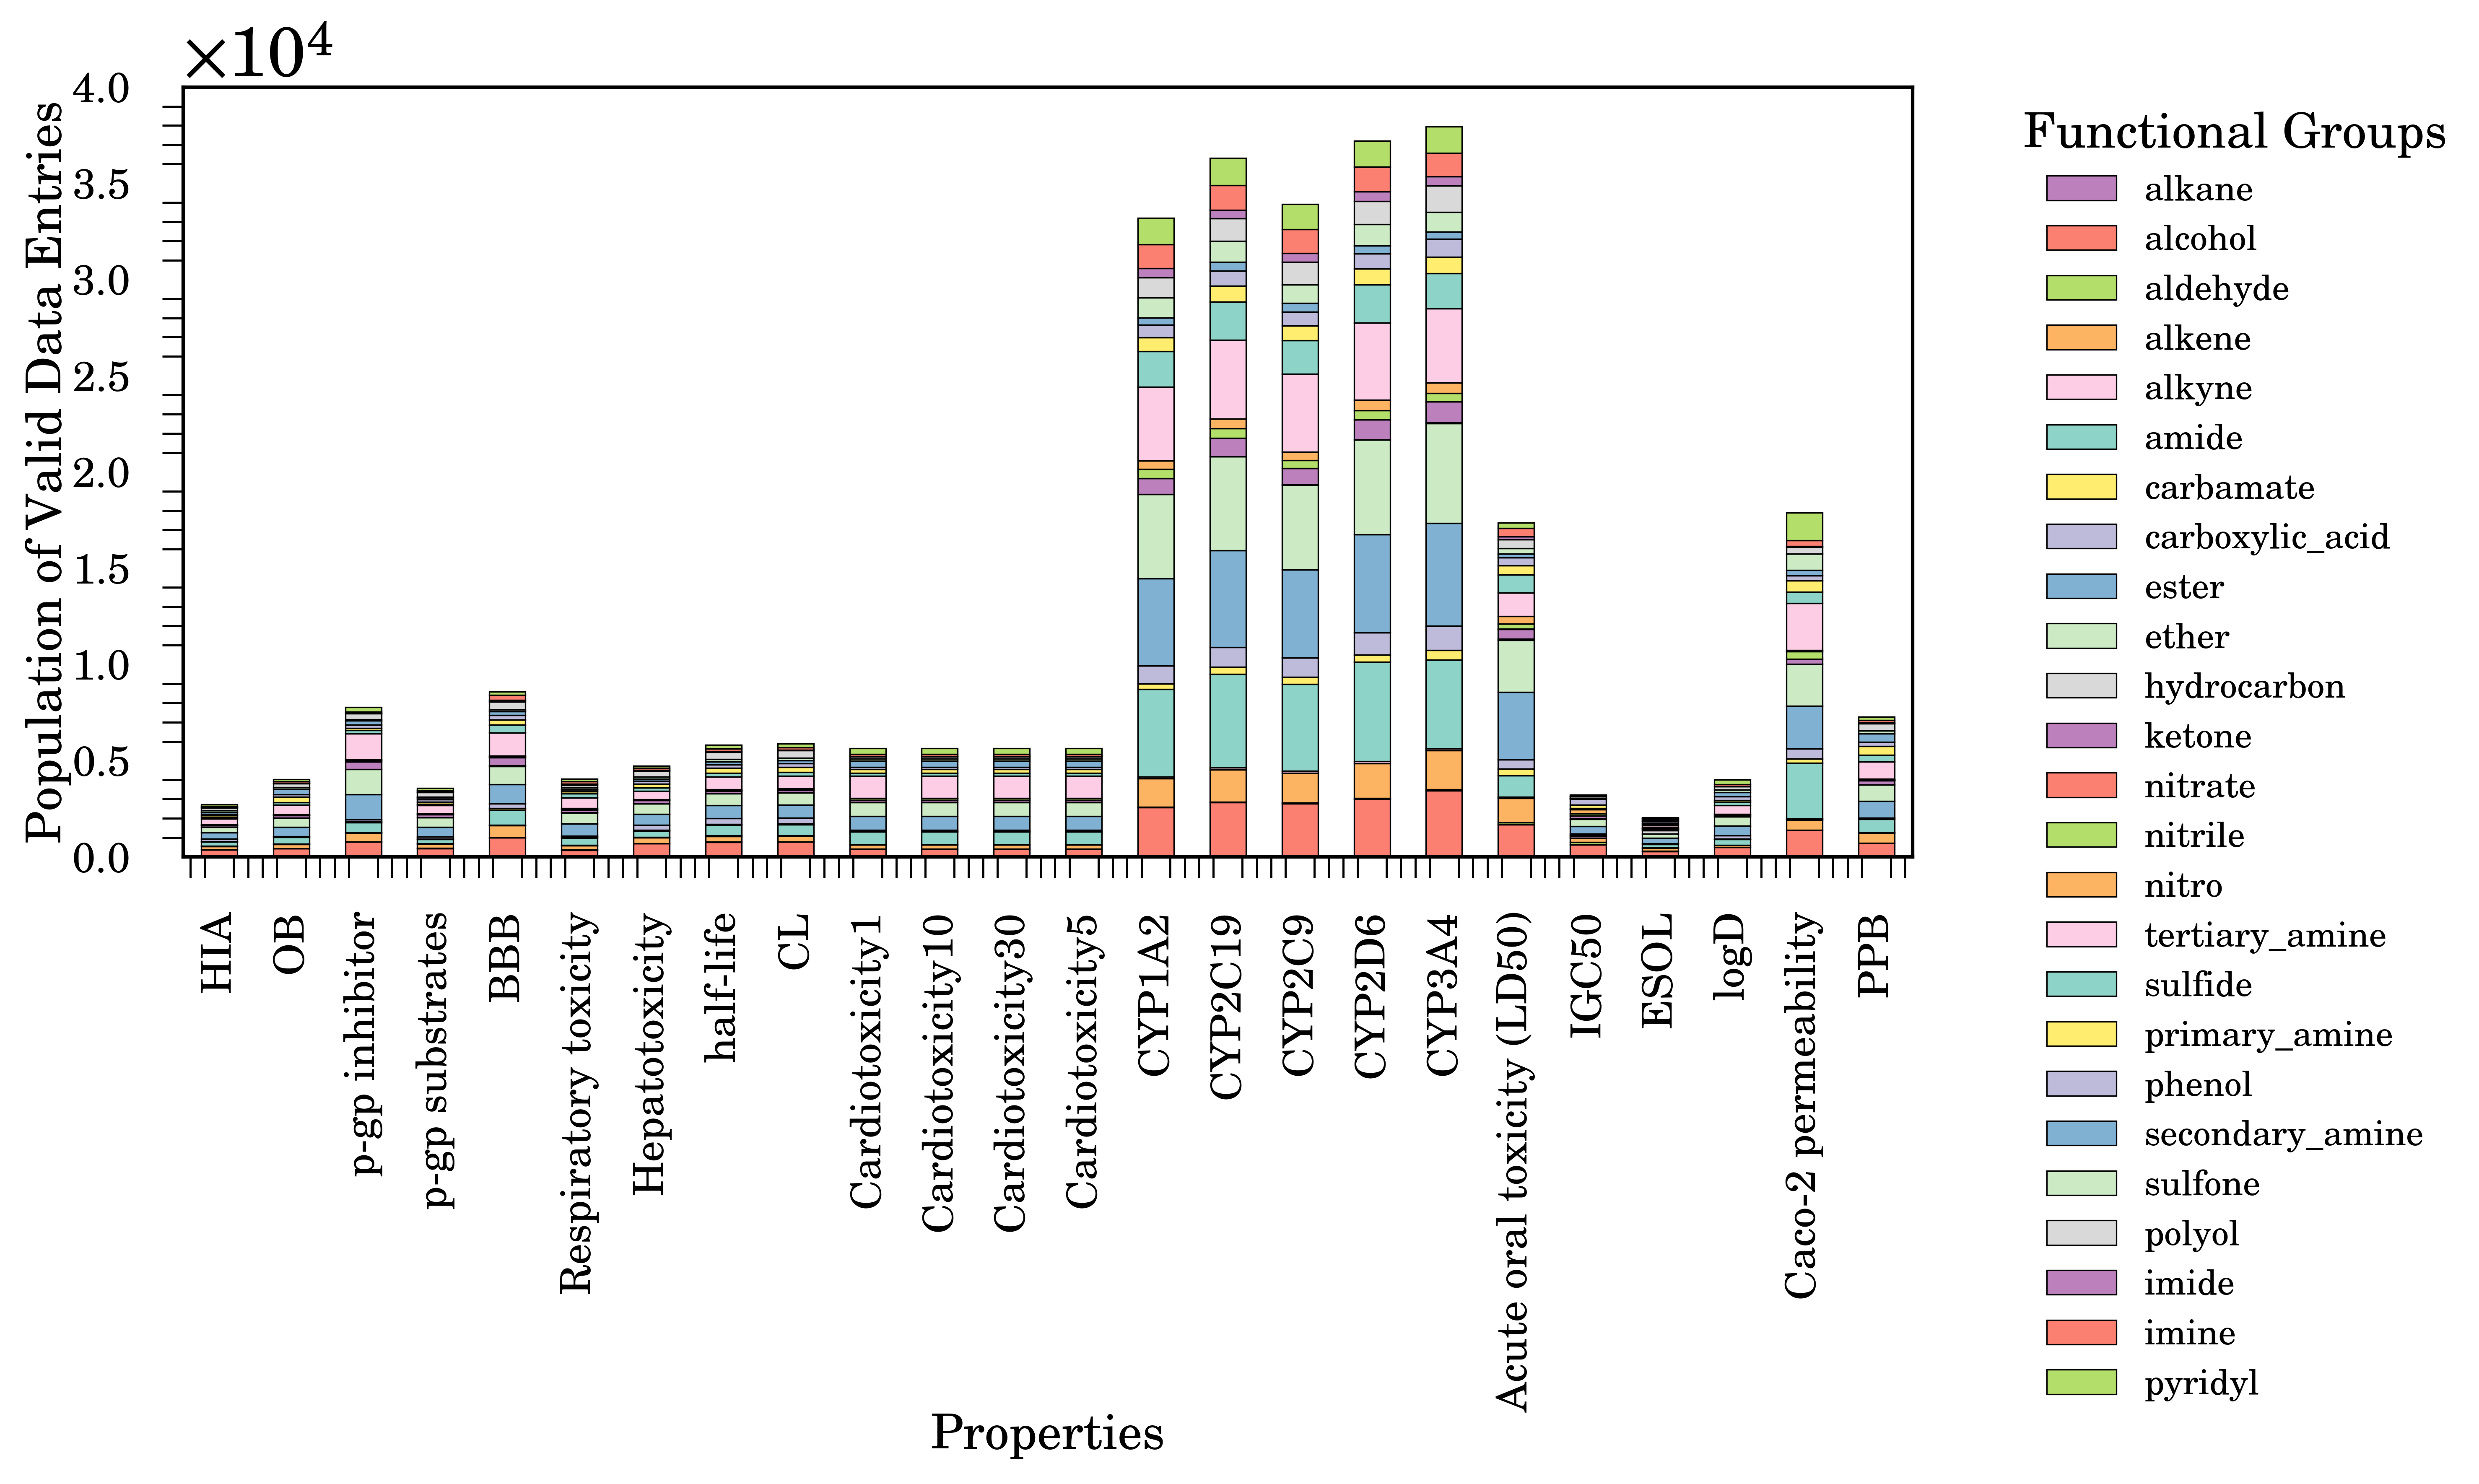

In [19]:
from matplotlib.ticker import ScalarFormatter
# Plot stacked bar graphs
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the size as needed
# Customize axis tick parameters
ax.tick_params(left=False, right=False, labelleft=True,
               labelbottom=True, bottom=False, labelsize=12)
# Plot stacked bar for each property, showing functional group distribution
count_matrix.plot(kind='bar', stacked=True, ax=ax)
# Set plot title and labels
ax.set_xlabel('Properties', fontsize=14)
ax.set_ylabel('Population of Valid Data Entries', fontsize=14)
# Format the y-axis to remove scientific notation (x10^4)
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.ticklabel_format(style='sci', axis='y')  # Ensures plain style without scientific notation
# Display legend
plt.legend(title="Functional Groups",title_fontsize = 14, bbox_to_anchor=(1.05, 1), loc='upper left',fontsize = 10)
plt.savefig('groups_across_props.pdf', dpi=600)  # Save with DPI of 400
# Show the plot
plt.tight_layout()
plt.show()